# Guided Project: Predicting Car Prices

# Introduction to the data set

In [1]:
import pandas as pd

cols = ['symboling', 'normalized_losses', 'make',
        'fuel_type', 'aspiration', 'num_doors', 
        'body_style', 'drive_wheels', 'engine_location',
        'wheel_base', 'length', 'width', 'height',
        'curb_weight', 'engine_type', 'num_cylinders',
        'engine_size', 'fuel_system', 'bore', 'stroke', 
        'compression_ratio', 'horsepower', 'peak_rpm',
        'city_mpg', 'highway_mpg', 'price']
cars = pd.read_csv("imports-85.data", names = cols)
cars.head(1)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495


In [2]:
numeric_cols = ['normalized_losses', 'wheel_base', 'length',
                'width', 'height', 'curb_weight', 'engine_size',
                'bore', 'stroke', 'compression_ratio', 'horsepower',
                'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
##numeric columns can be used as features
target_col = 'price'
##price is the target column

In [3]:
numeric_cars = cars[numeric_cols]
numeric_cars.head(1)

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495


for col in numeric_cols:
    print(type(numeric_cars[col].iloc[0]))

# Data Cleaning

In [4]:
import numpy as np
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars.head(1)

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495


for col in numeric_cols:
    print(type(numeric_cars[col].iloc[1]))

In [5]:
numeric_cars = numeric_cars.astype('float')

In [6]:
for col in numeric_cols:
    print(type(numeric_cars[col].iloc[1]))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [7]:
#number of rows that have a missing value 
numeric_cars.isnull().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [8]:
#price is the target column , thus drop rows with price column as null
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [9]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [10]:
price_col = numeric_cars['price']
numeric_cars = (numeric_cars-numeric_cars.min())/(numeric_cars.max() -numeric_cars.min())
numeric_cars['price'] = price_col
numeric_cars.head(5)

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


# Univariate Model

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from copy import deepcopy

def knn_train_test(train_col_name, target_col_name, df):
    len_df = len(df.index.tolist())
    train_df = df.iloc[0:int(len_df/2)]
    test_df = df.iloc[int(len_df/2):]
    knn = KNeighborsRegressor()

    knn.fit(train_df[[train_col_name]], train_df[target_col_name])
    predictions = knn.predict(test_df[[train_col_name]])
    mse = mean_squared_error(test_df[target_col_name], predictions)
    rmse = np.sqrt(mse)
    return rmse

numeric_cols_temp = deepcopy(numeric_cols)
numeric_cols_temp.remove('price')
rmse_dict = dict()

for c in numeric_cols_temp:
    rmse_dict[c] = knn_train_test(c, 'price', numeric_cars)
    
# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_dict)
rmse_results_series.sort_values()


engine_size           4190.433888
horsepower            4267.730361
highway_mpg           4628.793094
city_mpg              4814.778015
curb_weight           5166.828581
width                 7110.412630
compression_ratio     8096.301512
normalized_losses     8131.436882
length                8304.189346
stroke                9334.714914
peak_rpm              9759.209970
wheel_base            9969.243292
height               10839.693636
bore                 13397.091693
dtype: float64

In [12]:
## engine_size column performed the best using default 'k'

In [13]:
## modifying knn_train_test() function to accept a parameter for 'k' 
## value

k_values = [1, 3, 5, 7, 9]

def knn_train_test(train_col_name, target_col_name, df, k):
    len_df = len(df.index.tolist())
    train_df = df.iloc[0:int(len_df/2)]
    test_df = df.iloc[int(len_df/2):]
    knn = KNeighborsRegressor(n_neighbors = k, algorithm='auto', 
                              metric = 'euclidean')
    knn.fit(train_df[[train_col_name]], train_df[target_col_name])
    predictions = knn.predict(test_df[[train_col_name]])
    mse = mean_squared_error(test_df[target_col_name], predictions)
    rmse = np.sqrt(mse)
    return rmse

numeric_cols_tempp = deepcopy(numeric_cols)
numeric_cols_tempp.remove('price')
rmse_dict_result= dict()

for c in numeric_cols_temp:
    rmse_dict = dict()
    for k in k_values:
        rmse_dict[k] = knn_train_test(c, 'price', numeric_cars,k)
    rmse_dict_result[c] = rmse_dict
# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_dict_result

{'bore': {1: 16502.858944335483,
  3: 13895.111787987171,
  5: 13397.091693481998,
  7: 11075.156453540423,
  9: 10178.905997122287},
 'city_mpg': {1: 5347.1502616620082,
  3: 5210.2611302222185,
  5: 4814.7780148494103,
  7: 4575.9500050566039,
  9: 4770.3441789226026},
 'compression_ratio': {1: 8085.6051421555012,
  3: 8137.9697256948321,
  5: 8096.3015121133867,
  7: 7896.6928707790858,
  9: 7823.115528549677},
 'curb_weight': {1: 6566.7491754043158,
  3: 5635.1847483924475,
  5: 5166.8285806461754,
  7: 5239.6312507047951,
  9: 5244.5555635847895},
 'engine_size': {1: 5338.7918201602415,
  3: 4698.5016730227026,
  5: 4190.4338878823601,
  7: 4114.5713077887176,
  9: 4056.6293596584378},
 'height': {1: 13032.276289928392,
  3: 11411.019683044135,
  5: 10839.693635873846,
  7: 10041.327943738908,
  9: 9313.3309652812659},
 'highway_mpg': {1: 5188.3334702021421,
  3: 4655.0814815167259,
  5: 4628.7930938146865,
  7: 4112.3878029567513,
  9: 4029.9622707968324},
 'horsepower': {1: 7027

# Visualizing the results using scatter plots

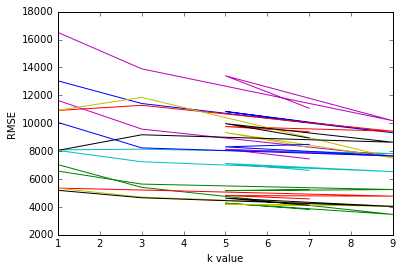

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in rmse_dict_result.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

# Multivariate Model

In [15]:
feature_avg_rmse = dict()
for k,v in rmse_dict_result.items():
    average_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = average_rmse

series_feature_avg_rmse = pd.Series(feature_avg_rmse)
series_feature_avg_rmse.sort_values()

engine_size           4479.785610
highway_mpg           4522.911624
horsepower            4795.755143
city_mpg              4943.696718
curb_weight           5570.589864
width                 7108.476258
compression_ratio     8007.936956
length                8545.374123
normalized_losses     8885.006588
wheel_base            8953.712114
stroke                9576.240416
peak_rpm             10154.303501
height               10927.529704
bore                 13009.824975
dtype: float64

In [17]:
## modified knn_train_test

def knn_train_test(train_col_name, target_col_name, df):
    len_df = len(df.index.tolist())
    train_df = df.iloc[0:int(len_df/2)]
    test_df = df.iloc[int(len_df/2):]
    knn = KNeighborsRegressor()
    knn.fit(train_df[train_col_name], train_df[target_col_name])
    predictions = knn.predict(test_df[train_col_name])
    mse = mean_squared_error(test_df[target_col_name], predictions)
    rmse = np.sqrt(mse)
    return rmse

two_best_features = ['engine_size', 'highway_mpg']
rmse_two = knn_train_test(two_best_features, 'price', numeric_cars)

three_best_features = ['engine_size', 'highway_mpg', 'horsepower']
rmse_three = knn_train_test(three_best_features, 'price', numeric_cars)

four_best_features = ['engine_size', 'highway_mpg', 'horsepower',
                      'city_mpg']
rmse_four = knn_train_test(four_best_features, 'price', numeric_cars)

five_best_features = ['engine_size', 'highway_mpg', 'horsepower',
                      'city_mpg','curb_weight']
rmse_five = knn_train_test(five_best_features, 'price', numeric_cars)

print("two_best_features : " + str(rmse_two) +"\n"+
     "three_best_features : " + str(rmse_three) +"\n"+
     "four_best_features : " + str(rmse_four) +"\n"+
     "five_best_features : " + str(rmse_five) +"\n")

two_best_features : 4350.73936855
three_best_features : 3553.98144036
four_best_features : 3543.60210884
five_best_features : 3874.82641022



# Hyperparameter Tuning

In [20]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

three_best_features = ['horsepower', 'width', 'curb_weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb_weight', 'city_mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb_weight', 'city_mpg' , 'highway_mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

k_rmse_results

{'five best features': {1: 2530.0554077602005,
  2: 2897.1757974767684,
  3: 3183.4597426217424,
  4: 3168.0230415758415,
  5: 3341.6024539726504,
  6: 3537.5205429981911,
  7: 3817.2904521188252,
  8: 4004.4145296855731,
  9: 3992.3186041830318,
  10: 4138.7287878533352,
  11: 4342.0528528290979,
  12: 4416.1453810311359,
  13: 4493.8798141857205,
  14: 4463.5016015545707,
  15: 4474.480783207805,
  16: 4553.5595362768345,
  17: 4597.001081375769,
  18: 4655.283442648355,
  19: 4687.9008939828218,
  20: 4712.0229855431653,
  21: 4755.8566258237734,
  22: 4788.162720030673,
  23: 4806.9233819650544,
  24: 4879.983352195467},
 'four best features': {1: 2516.5892799502258,
  2: 2811.1727257604443,
  3: 3013.3615157930335,
  4: 3126.2694826412612,
  5: 3280.3807311630976,
  6: 3479.5099401018138,
  7: 3781.5612742414464,
  8: 3988.8669577450623,
  9: 4024.9986213622451,
  10: 4042.2472261878988,
  11: 4230.3352486840677,
  12: 4354.0086751540612,
  13: 4461.6266648777882,
  14: 4468.02984

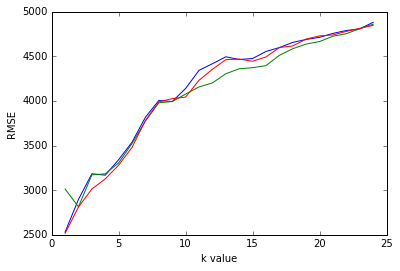

In [21]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

k= 1, is the most optimal value for each model with 
four_best_features = ['horsepower', 'width', 'curb_weight', 'city_mpg']
three_best_features = ['horsepower', 'width', 'curb_weight'],
